<h2 align="center"> Titanic Survival Prediction Case Study </h2>

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

### Loading Dataset

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Checking shape of dataset

In [3]:
df.shape

(891, 12)

#### Checking Null Values 

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* As the total 891 rows , In 'Cabin' there are more than 70% data is missing , so it is irrelevant to fill it 
* Drop  Cabin column

In [5]:
df.pop('Cabin')

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [6]:
df.shape

(891, 11)

### Filling Missing Values

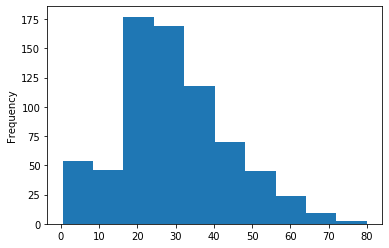

In [7]:
df['Age'].plot.hist()

* as Curve is Bell Shaped , so fill the missing values by Mean

In [8]:
df['Age'].fillna(df['Age'].mean(), inplace= True)

* Embarked column is categorical so calculating the mode and filling it 

In [9]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

* We observe that max people are from S-southampton so we fill all with S

In [10]:
df["Embarked"].fillna(value='S',inplace=True)

* Now checking missing values

In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

* All missing values are filled now , 

## Droping Irrelevent columns 

* As the name column contain different name and the survival is not relevant to names
* passenger Id does not make any sense
* Ticket number doesnt provide any relevant information whether they survived or not so drop it

In [12]:
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


*  Now data only conatin relevant columns

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


### Changing Text data to Categorical 

* Label Encoding it encode the value as per given instance
- Eg- columns has 3 category C/S/Q--it will form label
    suppose 0-C, 1-S, 2-Q

In [15]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

df["Sex"] = lab.fit_transform(df["Sex"])
df["Embarked"] = lab.fit_transform(df["Embarked"])

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


<h2 align='center'> K-Nearest Neighbour </h2>

### Importing modules

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

**By Using Function:**

In [18]:
def prediction(n):
    x = df.drop(['Pclass'],axis=1)
    y = df['Pclass']
    k = []
    s = []
    
    for i in range(1,n):
        knn = KNeighborsClassifier(n_neighbors = i)
        k.append(i)
        
        print("--------------------------------------------------------------------------------------")
        print(f"Here k value is {i}: ")
    
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.3, random_state=0)
        model = knn.fit(x_train,y_train)
        pred = model.predict(x_test)
        
        score = model.score(x_test,y_test)
        s.append(score)
    
        print(f"\nAcuuracy when k is {i} ", score)
        print(f"Confusion matrix when k is {i}  \n", confusion_matrix(y_test, pred))
        
    plt.plot(k,s)
    plt.xlabel("K value")
    plt.ylabel("Accuracy score")
    plt.title("Graph between k value of knn and Accuracy score")
    plt.show()

Enter The number of iteration you want for k: 268
--------------------------------------------------------------------------------------
Here k value is 1: 

Acuuracy when k is 1  0.8544776119402985
Confusion matrix when k is 1  
 [[ 56   4   0]
 [  9  34   9]
 [  2  15 139]]
--------------------------------------------------------------------------------------
Here k value is 2: 

Acuuracy when k is 2  0.8283582089552238
Confusion matrix when k is 2  
 [[ 57   3   0]
 [ 11  37   4]
 [  5  23 128]]
--------------------------------------------------------------------------------------
Here k value is 3: 

Acuuracy when k is 3  0.8470149253731343
Confusion matrix when k is 3  
 [[ 55   3   2]
 [ 10  33   9]
 [  3  14 139]]
--------------------------------------------------------------------------------------
Here k value is 4: 

Acuuracy when k is 4  0.8395522388059702
Confusion matrix when k is 4  
 [[ 57   2   1]
 [ 12  32   8]
 [  4  16 136]]
------------------------------------------


Acuuracy when k is 39  0.7798507462686567
Confusion matrix when k is 39  
 [[ 55   2   3]
 [ 11  15  26]
 [  6  11 139]]
--------------------------------------------------------------------------------------
Here k value is 40: 

Acuuracy when k is 40  0.7611940298507462
Confusion matrix when k is 40  
 [[ 55   2   3]
 [ 12  13  27]
 [  6  14 136]]
--------------------------------------------------------------------------------------
Here k value is 41: 

Acuuracy when k is 41  0.7686567164179104
Confusion matrix when k is 41  
 [[ 55   2   3]
 [ 11  15  26]
 [  6  14 136]]
--------------------------------------------------------------------------------------
Here k value is 42: 

Acuuracy when k is 42  0.7611940298507462
Confusion matrix when k is 42  
 [[ 55   2   3]
 [ 13  15  24]
 [  6  16 134]]
--------------------------------------------------------------------------------------
Here k value is 43: 

Acuuracy when k is 43  0.7611940298507462
Confusion matrix when k is 43  
 [[ 5

Here k value is 79: 

Acuuracy when k is 79  0.7313432835820896
Confusion matrix when k is 79  
 [[ 43   9   8]
 [  3   9  40]
 [  7   5 144]]
--------------------------------------------------------------------------------------
Here k value is 80: 

Acuuracy when k is 80  0.7350746268656716
Confusion matrix when k is 80  
 [[ 44   8   8]
 [  3   9  40]
 [  8   4 144]]
--------------------------------------------------------------------------------------
Here k value is 81: 

Acuuracy when k is 81  0.7388059701492538
Confusion matrix when k is 81  
 [[ 44   9   7]
 [  3   9  40]
 [  7   4 145]]
--------------------------------------------------------------------------------------
Here k value is 82: 

Acuuracy when k is 82  0.7425373134328358
Confusion matrix when k is 82  
 [[ 45   9   6]
 [  3  10  39]
 [  8   4 144]]
--------------------------------------------------------------------------------------
Here k value is 83: 

Acuuracy when k is 83  0.7388059701492538
Confusion matrix


Acuuracy when k is 116  0.7164179104477612
Confusion matrix when k is 116  
 [[ 41   8  11]
 [  3   7  42]
 [  5   7 144]]
--------------------------------------------------------------------------------------
Here k value is 117: 

Acuuracy when k is 117  0.7164179104477612
Confusion matrix when k is 117  
 [[ 41   8  11]
 [  3   7  42]
 [  5   7 144]]
--------------------------------------------------------------------------------------
Here k value is 118: 

Acuuracy when k is 118  0.7238805970149254
Confusion matrix when k is 118  
 [[ 41   8  11]
 [  3   9  40]
 [  5   7 144]]
--------------------------------------------------------------------------------------
Here k value is 119: 

Acuuracy when k is 119  0.7164179104477612
Confusion matrix when k is 119  
 [[ 41   6  13]
 [  3   7  42]
 [  5   7 144]]
--------------------------------------------------------------------------------------
Here k value is 120: 

Acuuracy when k is 120  0.7276119402985075
Confusion matrix when k 


Acuuracy when k is 152  0.746268656716418
Confusion matrix when k is 152  
 [[ 40  10  10]
 [  3  12  37]
 [  3   5 148]]
--------------------------------------------------------------------------------------
Here k value is 153: 

Acuuracy when k is 153  0.7425373134328358
Confusion matrix when k is 153  
 [[ 40   9  11]
 [  3  11  38]
 [  3   5 148]]
--------------------------------------------------------------------------------------
Here k value is 154: 

Acuuracy when k is 154  0.7425373134328358
Confusion matrix when k is 154  
 [[ 40   9  11]
 [  3  11  38]
 [  3   5 148]]
--------------------------------------------------------------------------------------
Here k value is 155: 

Acuuracy when k is 155  0.7425373134328358
Confusion matrix when k is 155  
 [[ 40   9  11]
 [  3  11  38]
 [  3   5 148]]
--------------------------------------------------------------------------------------
Here k value is 156: 

Acuuracy when k is 156  0.7425373134328358
Confusion matrix when k i


Acuuracy when k is 188  0.746268656716418
Confusion matrix when k is 188  
 [[ 39   7  14]
 [  2   8  42]
 [  3   0 153]]
--------------------------------------------------------------------------------------
Here k value is 189: 

Acuuracy when k is 189  0.746268656716418
Confusion matrix when k is 189  
 [[ 39   7  14]
 [  2   8  42]
 [  3   0 153]]
--------------------------------------------------------------------------------------
Here k value is 190: 

Acuuracy when k is 190  0.746268656716418
Confusion matrix when k is 190  
 [[ 39   7  14]
 [  2   8  42]
 [  3   0 153]]
--------------------------------------------------------------------------------------
Here k value is 191: 

Acuuracy when k is 191  0.746268656716418
Confusion matrix when k is 191  
 [[ 39   7  14]
 [  2   8  42]
 [  3   0 153]]
--------------------------------------------------------------------------------------
Here k value is 192: 

Acuuracy when k is 192  0.746268656716418
Confusion matrix when k is 19


Acuuracy when k is 227  0.7276119402985075
Confusion matrix when k is 227  
 [[ 38   7  15]
 [  2   4  46]
 [  2   1 153]]
--------------------------------------------------------------------------------------
Here k value is 228: 

Acuuracy when k is 228  0.7276119402985075
Confusion matrix when k is 228  
 [[ 38   7  15]
 [  2   4  46]
 [  2   1 153]]
--------------------------------------------------------------------------------------
Here k value is 229: 

Acuuracy when k is 229  0.7276119402985075
Confusion matrix when k is 229  
 [[ 38   6  16]
 [  2   4  46]
 [  2   1 153]]
--------------------------------------------------------------------------------------
Here k value is 230: 

Acuuracy when k is 230  0.7238805970149254
Confusion matrix when k is 230  
 [[ 38   7  15]
 [  2   3  47]
 [  2   1 153]]
--------------------------------------------------------------------------------------
Here k value is 231: 

Acuuracy when k is 231  0.7238805970149254
Confusion matrix when k 

Confusion matrix when k is 265  
 [[ 38   2  20]
 [  2   1  49]
 [  2   1 153]]
--------------------------------------------------------------------------------------
Here k value is 266: 

Acuuracy when k is 266  0.7164179104477612
Confusion matrix when k is 266  
 [[ 38   2  20]
 [  2   1  49]
 [  2   1 153]]
--------------------------------------------------------------------------------------
Here k value is 267: 

Acuuracy when k is 267  0.7164179104477612
Confusion matrix when k is 267  
 [[ 38   2  20]
 [  2   1  49]
 [  2   1 153]]


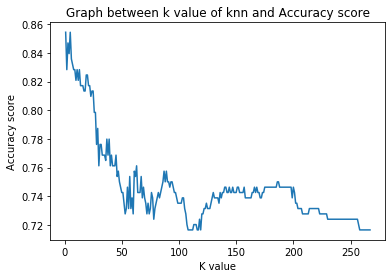

In [19]:
num = int(input('Enter The number of iteration you want for k: '))
prediction(num)

## Conclusion:

<hr>

* When the k value is 1 , It gives highest accuracy : 0.8544 (but it overfits the data) 
* When the k value is 5 , It gives same accuracy as that for k=1 : 0.8544
* After k=5 ,  the accuracy decreases

So, K = 5 is the best k for this model 